# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as  sns

In [2]:
df = pd.read_csv('datasets/Retail_Store.csv' , encoding='latin-1')

In [13]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [11]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [5]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 53)


In [9]:
# Drop duplicate rows
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [24]:
print(df['Delivery Status'].unique())
print(df['Shipping Mode'].unique())
print(df['Department Name'].unique())
print(df['Market'].unique())

['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled']
['Standard Class' 'First Class' 'Second Class' 'Same Day']
['Fitness' 'Apparel' 'Golf' 'Footwear' 'Outdoors' 'Fan Shop' 'Technology'
 'Book Shop' 'Discs Shop' 'Pet Shop' 'Health and Beauty ']
['Pacific Asia' 'USCA' 'Africa' 'Europe' 'LATAM']


In [11]:
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

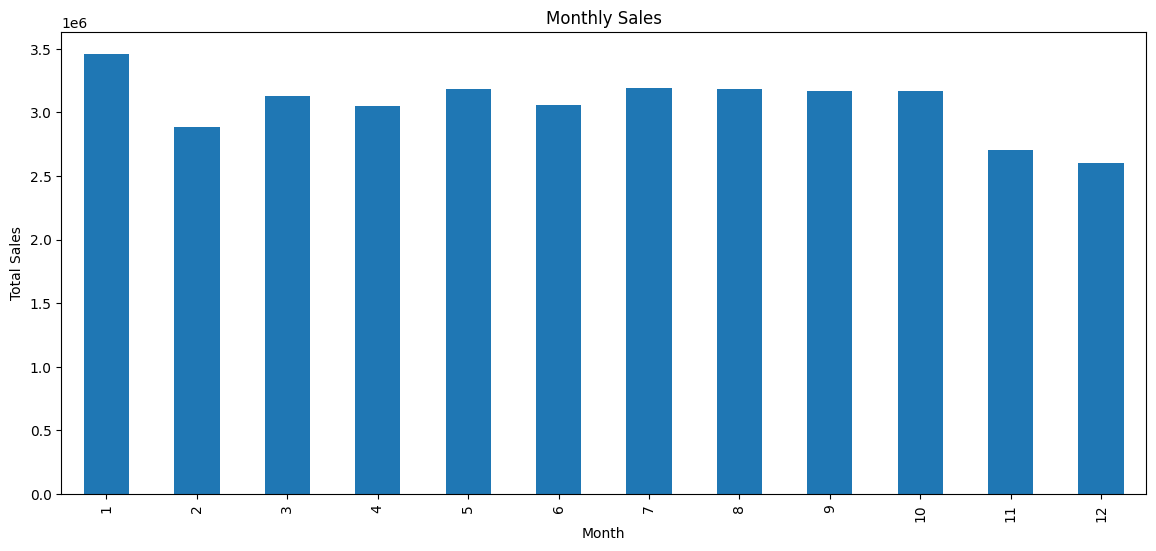

In [25]:
monthly_sales = df.groupby('month')['Sales'].sum()
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [30]:
year2018_data = df[df['order_date'].dt.year == 2018]

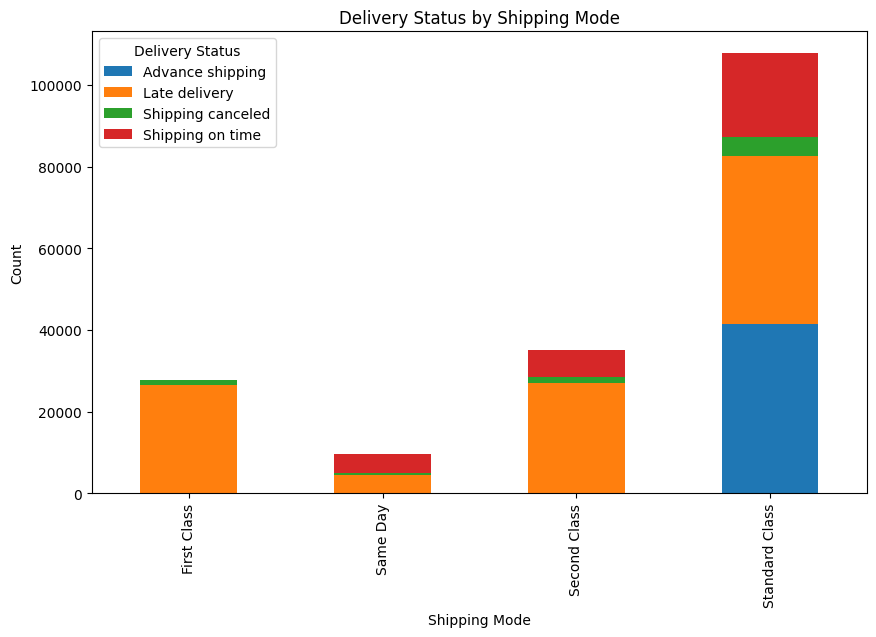

In [12]:
status_counts = pd.crosstab(df['Shipping Mode'], df['Delivery Status'])

# Plot stacked bar
status_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Delivery Status by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.legend(title='Delivery Status')
plt.show()

First Class shipping mode is highly unreliable, it is always late. Across all types of shipping modes, delivery timings can be improved.

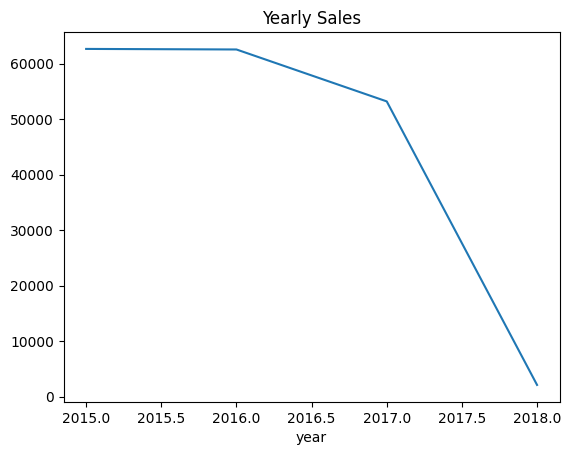

In [33]:
df['year'].value_counts().sort_index().plot(kind='line', title='Yearly Sales')
plt.rcParams['figure.figsize'] = (14, 6)
plt.show()

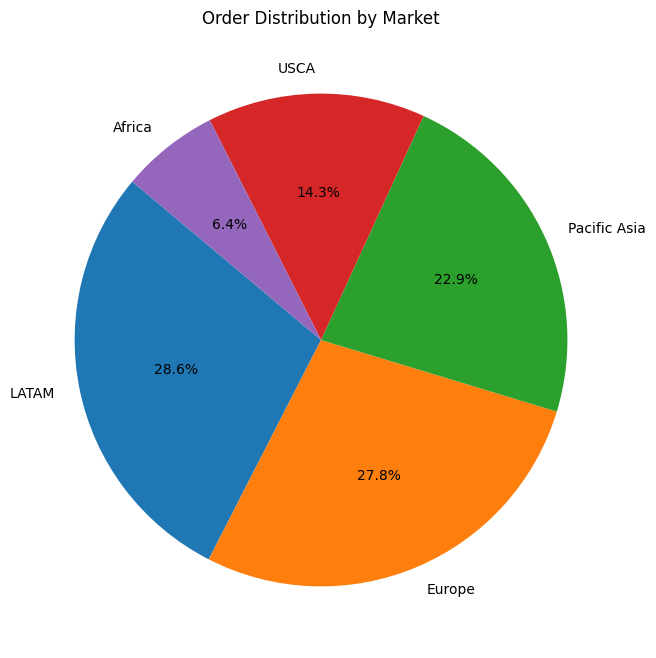

In [ ]:
market_counts = df['Market'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(market_counts, labels=market_counts.index, startangle=140, autopct="%.1f%%")

# Adding a title
plt.title('Order Distribution by Market')

# Display the plot
plt.show()

# Machine Learning